# Predict the Salary of Baseball players from data of 1986 and 1987 seasons

# DataSet description

## Major League Baseball Data from the 1986 and 1987 seasons

### This data has 322 observations of major league players on the following 20 variables.
1. AtBat : Number of times at bat in 1986
2. Hits : Number of hits in 1986
3. HmRun : Number of home runs in 1986
4. Runs : Number of runs in 1986
5. RBI : Number of runs batted in in 1986
6. Walks : Number of walks in 1986
7. Years : Number of years in the major leagues
8. CAtBat : Number of times at bat during his career
9. CHits : Number of hits during his career
10. CHmRun : Number of home runs during his career
11. CRuns : Number of runs during his career
12. CRBI : Number of runs batted in during his career
13. CWalks : Number of walks during his career
14. League : A factor with levels A and N indicating player's league at the end of 1986
15. Division : A factor with levels E and W indicating player's division at the end of 1986
16. PutOuts : Number of put outs in 1986
17. Assists : Number of assists in 1986
18. Errors : Number of errors in 1986
19. Salary : 1987 annual salary on opening day in thousands of dollars
20. NewLeague : A factor with levels A and N indicating player's league at the beginning of 1987

## Read the data file and load into a data frame

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
data = pd.read_csv("BaseBallPayers.csv")

In [5]:
data.head(5)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [6]:
data.tail(5)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A
321,631,170,9,77,44,31,11,4908,1457,30,775,357,249,A,W,408,4,3,1000.0,A


In [4]:
data.head(2).T

,0,1
AtBat,293,315
Hits,66,81
HmRun,1,7
Runs,30,24
RBI,29,38
Walks,14,39
Years,1,14
CAtBat,293,3449
CHits,66,835
CHmRun,1,69


## Descrpition of the data?

In [9]:
data.shape

(322, 20)

In [10]:
data.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
AtBat        322 non-null int64
Hits         322 non-null int64
HmRun        322 non-null int64
Runs         322 non-null int64
RBI          322 non-null int64
Walks        322 non-null int64
Years        322 non-null int64
CAtBat       322 non-null int64
CHits        322 non-null int64
CHmRun       322 non-null int64
CRuns        322 non-null int64
CRBI         322 non-null int64
CWalks       322 non-null int64
League       322 non-null object
Division     322 non-null object
PutOuts      322 non-null int64
Assists      322 non-null int64
Errors       322 non-null int64
Salary       263 non-null float64
NewLeague    322 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 50.4+ KB


In [14]:
data.dtypes

AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object

## Data Cleaning

### Remove missing values if any?
- We will impute the mssing values with median as the data points are very less

In [8]:
data.isna().apply(pd.value_counts)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
False,322.0,322.0,322.0,322.0,322.0,322.0,322.0,322.0,322.0,322.0,322.0,322.0,322.0,322.0,322.0,322.0,322.0,322.0,263,322.0
True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,NaN


535.9258821292775 425.0


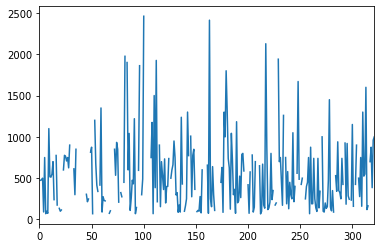

In [22]:
print(data['Salary'].mean(), data['Salary'].median())
data['Salary'].plot()
plt.show()

In [29]:
data['Salary'] = data['Salary'].fillna(data['Salary'].median())

In [30]:
data.isna().apply(pd.value_counts)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
False,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322


## EDA

In [33]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.5,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.0,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.0,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.0,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.0,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0


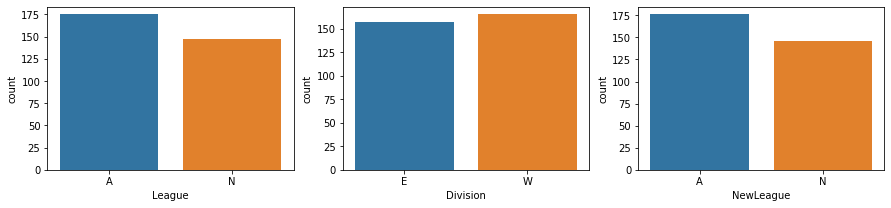

In [40]:
fig, ax = plt.subplots(1,3, figsize=(15,3))
for col, subplot in zip(data.select_dtypes(include=object).columns, ax.flatten()):
    sns.countplot(col, data=data, ax=subplot)
plt.show()

### Histogram plots of Numerical columns

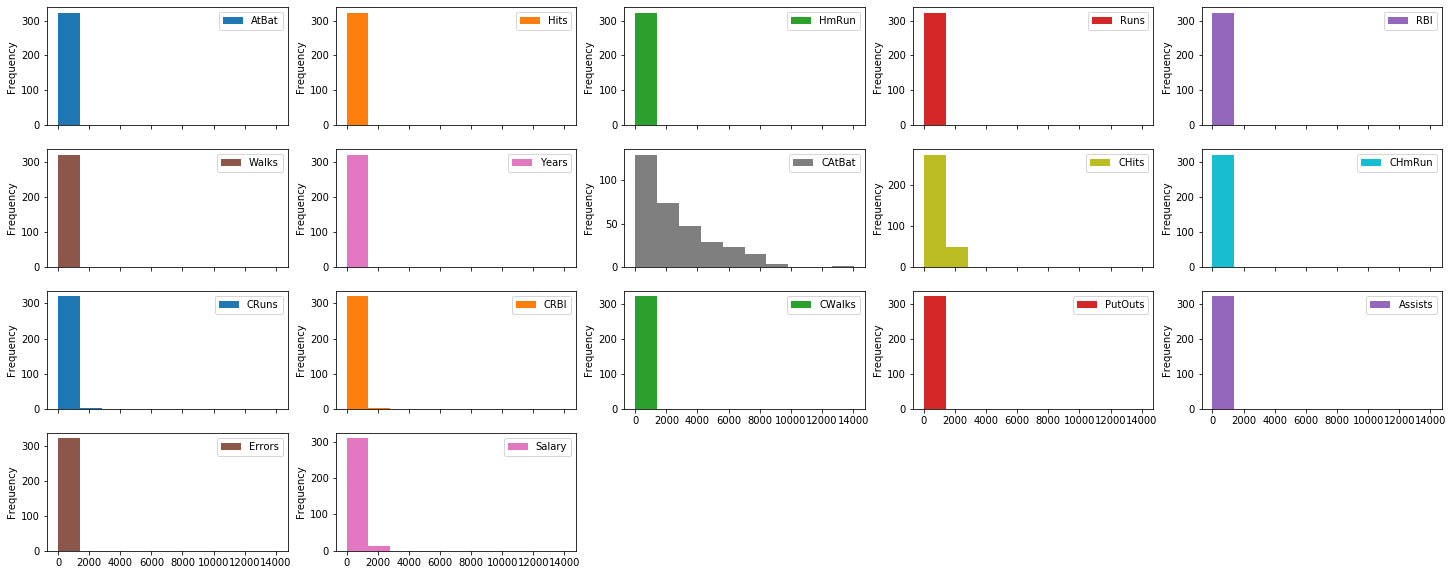

In [47]:
data.plot(kind='hist', subplots=True, layout=(4,5), figsize=(25,10))
plt.show()

### Pair Plot

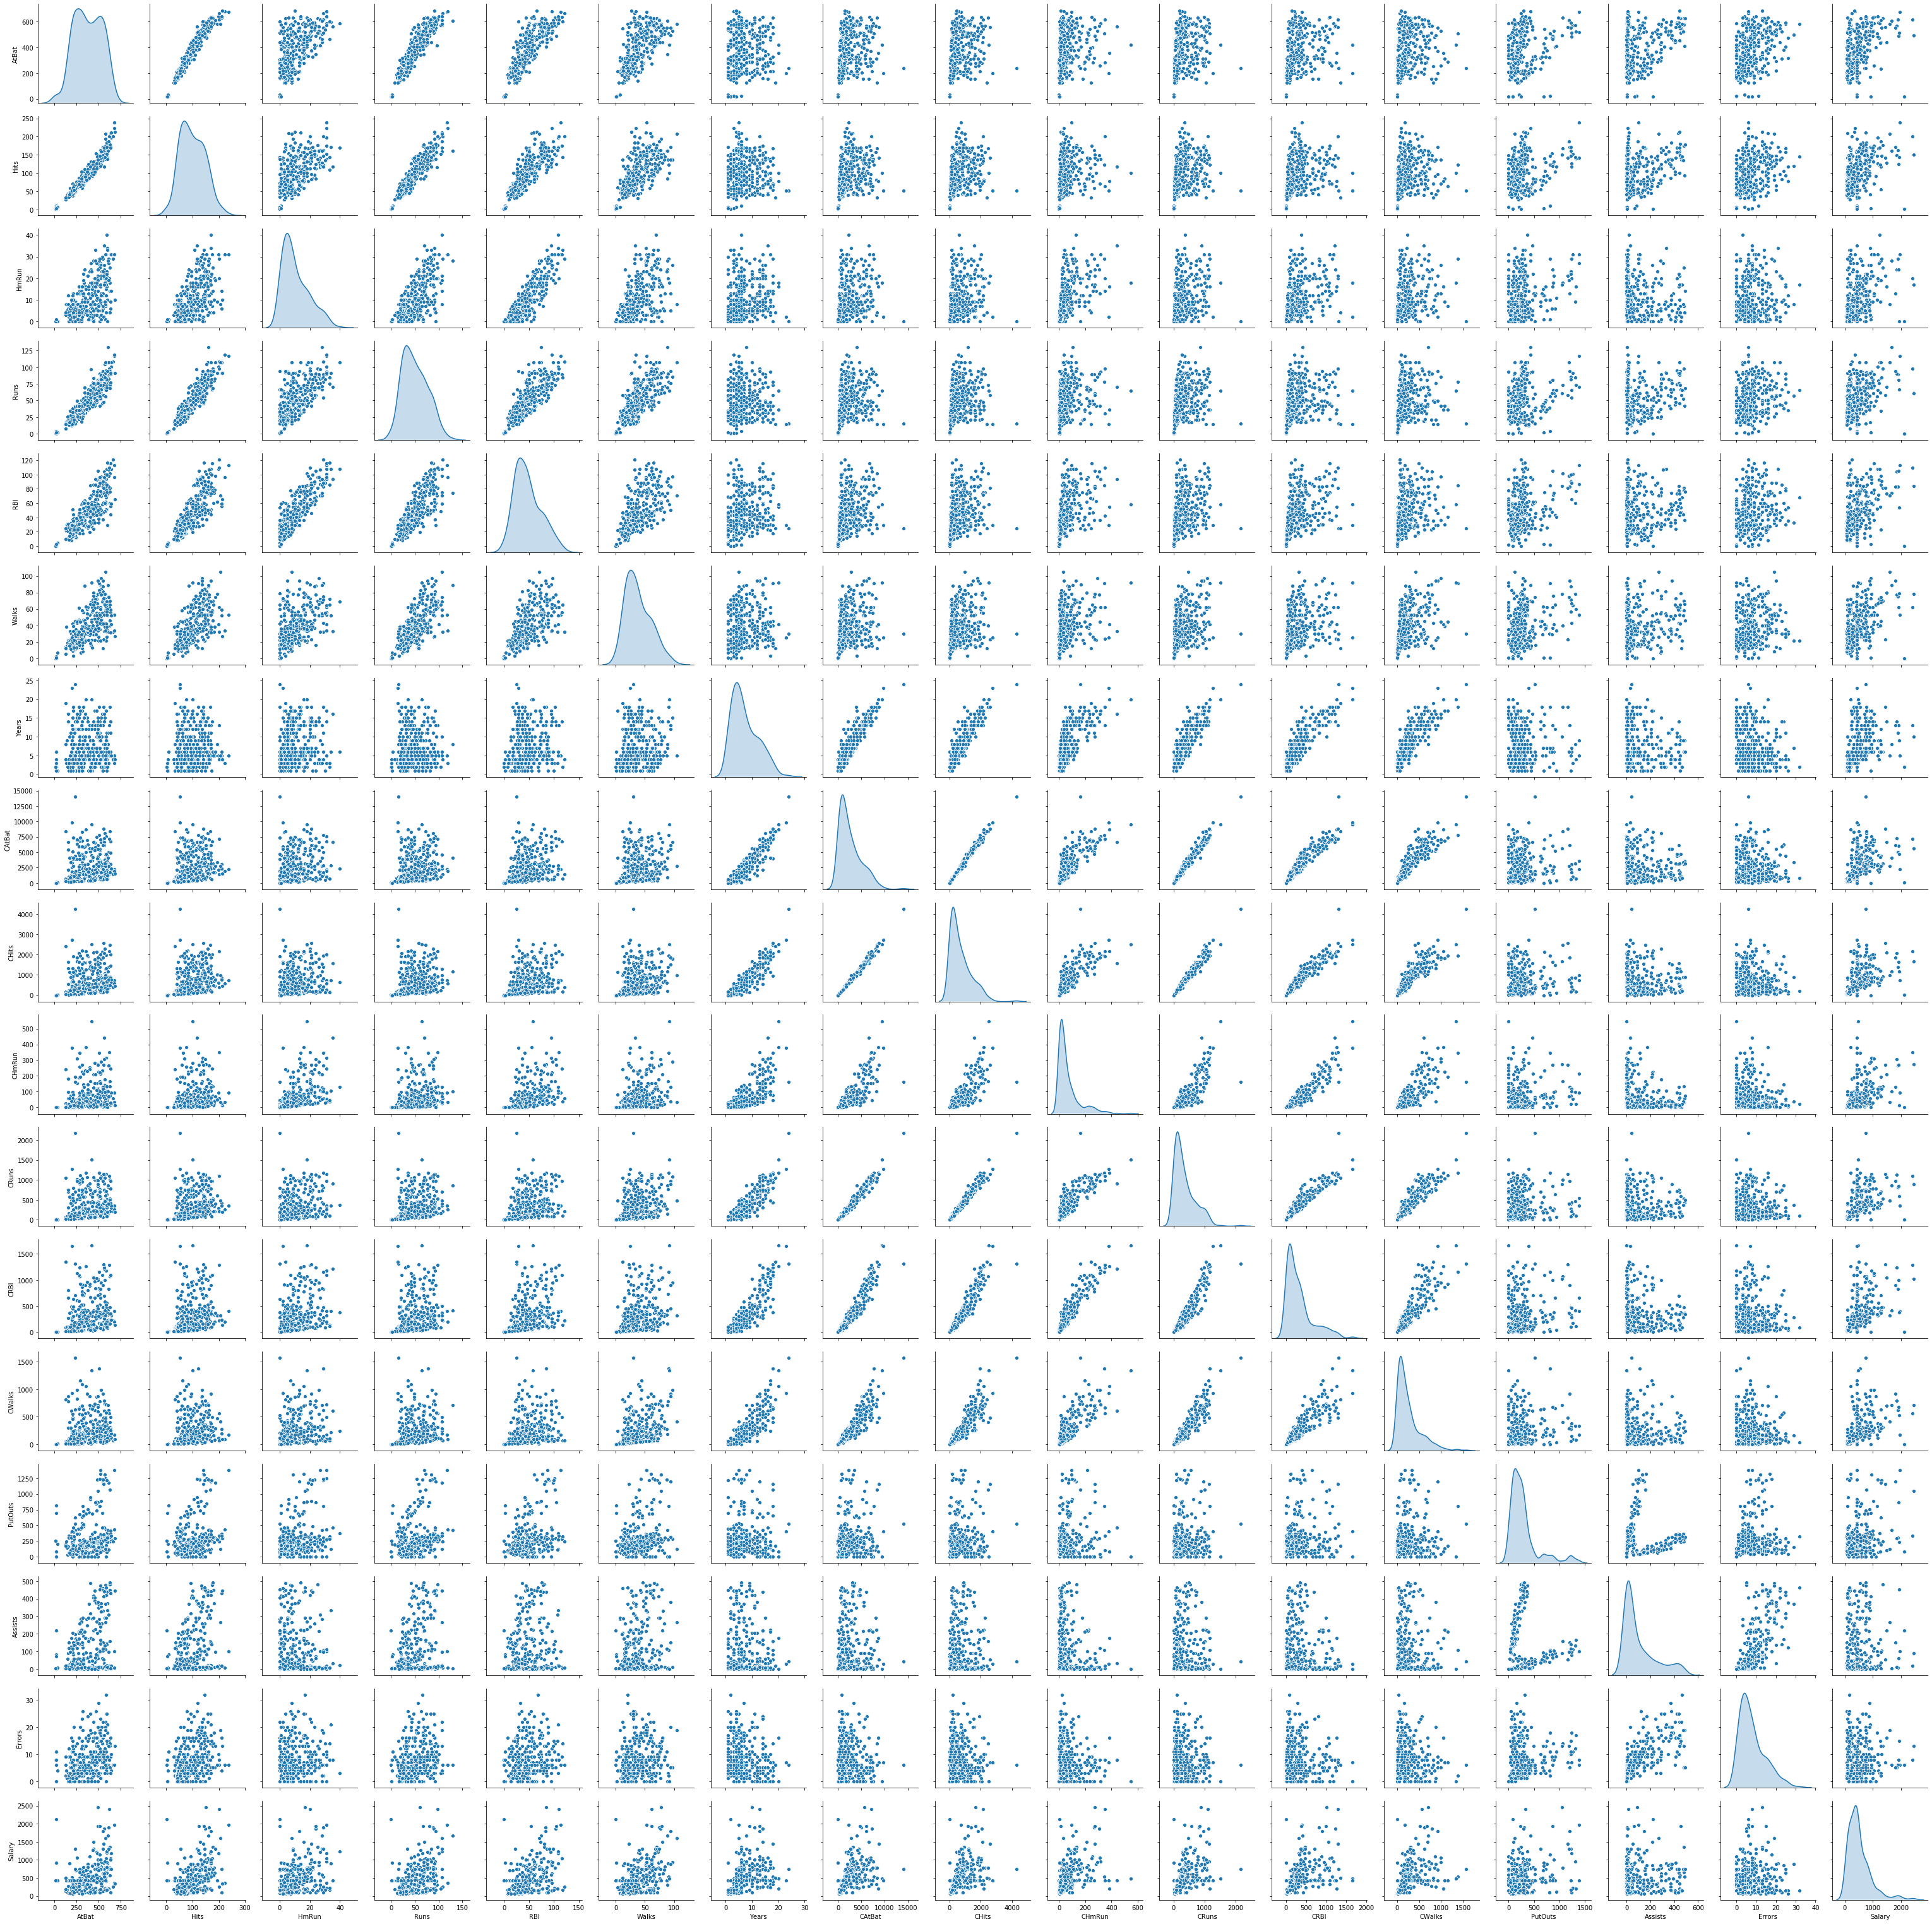

In [48]:
ax= sns.pairplot(data, diag_kind='kde')

- AtBat and Hits have a very strong correlation between them.
- Run has a good correlation between AtBat and Hits and meddium correlation with Runs, RBI and Walks
- We can say that AtBat, Hits, HmRun, Runs, RBI and Walks have  correlation among them
- The columns Years, CAtBat, CHits, CHmRun, CRuns, CRBI, CWalks are also correlated amongg them
- CAtBat, CHits, CRuns have a very strong correlation among them
- The other columns PutOuts, Assists and Errors do not have correlation between them

### Calculate correlation table

In [114]:
data.corr()[data.corr()>=0.90]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
AtBat,1.000000,0.967939,NaN,0.913060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hits,0.967939,1.000000,NaN,0.922187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HmRun,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Runs,0.913060,0.922187,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RBI,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Walks,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Years,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.920289,0.903631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAtBat,NaN,NaN,NaN,NaN,NaN,NaN,0.920289,1.000000,0.995063,NaN,0.983345,0.949219,0.906501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHits,NaN,NaN,NaN,NaN,NaN,NaN,0.903631,0.995063,1.000000,NaN,0.984609,0.945141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHmRun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.929484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### One Hot encoding categorical variables

In [50]:
data.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [51]:
data = pd.get_dummies(data, drop_first=True)

In [52]:
data.head(3)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,425.0,0,0,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0


## Build the following Linear Regression models and analyze repective, RMSE, RMSE %, R^2 and Adjusted R^2

In [57]:
## Adjusted R^2
def AdjRsquare(modelToBeTested, indData, target):
    Rsquare = modelToBeTested.score(indData, target)
    NoData = len(target)
    p = indData.shape[1]
    tempRsquare = 1 - (1-Rsquare)*(NoData-1)/(NoData - p - 1)
    return tempRsquare

### Function to find Model Performance of all models

In [58]:
def linRegcheckModelPerformance(X, y):
    
    #Split Data into train and test
    test_size = 0.30
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=123)
    
    #Instatiate LR model
    model = LinearRegression()
    
    # Build model with train data set
    model.fit(X_train, y_train)
    
    # Train accuracies
    trainR2 = model.score(X_train, y_train)
    predictedSales_train = model.predict(X_train)
    trainMSE = metrics.mean_squared_error(predictedSales_train, y_train)
    trainRMSE = np.sqrt(trainMSE)
    trainRMSE_pct = trainRMSE/np.mean(np.mean(np.array(y_train)))*100
    trainAdjR2 = AdjRsquare(model, X_train, y_train)
    trainAccuracies = [len(y_train), trainRMSE, trainRMSE_pct, trainR2, trainAdjR2]
    
    # Test accuracies
    testR2 = model.score(X_test, y_test)
    predictedSales_test = model.predict(X_test)
    testMSE = metrics.mean_squared_error(predictedSales_test, y_test)
    testRMSE = np.sqrt(testMSE)
    testRmse_pct = testRMSE/np.mean(np.mean(np.array(y_test)))*100
    testAdjR2 = AdjRsquare(model, X_test, y_test)
    testAccuracies = [len(y_test), testRMSE, testRmse_pct, testR2, testAdjR2]
    
    # Create dataframe for results
    resultsDf = pd.DataFrame(index = ["DataSize", "RMSE", "RMSE_Pct", "R2", "AdjR2"])
    resultsDf['trainData'] = trainAccuracies
    resultsDf['testData'] = testAccuracies
    
    return ( round(resultsDf, 4))

In [55]:
data.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'Salary', 'League_N', 'Division_W', 'NewLeague_N'],
      dtype='object')

# Single linear Regression Models

# M1

'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks'

Salary = beta_0 + beta_1 * AtBat 

In [56]:
X = data[['AtBat']]
y = data[['Salary']]

In [63]:
linRegcheckModelPerformance(X,y)

,trainData,testData
DataSize,225.0000,97.0000
RMSE,376.5707,391.2792
RMSE_Pct,76.2404,69.1453
R2,0.1796,-0.0122
AdjR2,0.1759,-0.0229


# M2

Salary = beta_0 + beta_1 * Hits

In [65]:
X = data[['Hits']]
y = data[['Salary']]

In [66]:
linRegcheckModelPerformance(X,y)

,trainData,testData
DataSize,225.0000,97.0000
RMSE,367.1141,389.7217
RMSE_Pct,74.3258,68.8701
R2,0.2203,-0.0042
AdjR2,0.2168,-0.0147


# M3

Salary = beta_0 + beta_1 * HmRun

In [67]:
X = data[['HmRun']]
y = data[['Salary']]

In [68]:
linRegcheckModelPerformance(X,y)

,trainData,testData
DataSize,225.0000,97.0000
RMSE,382.0256,400.5867
RMSE_Pct,77.3448,70.7901
R2,0.1556,-0.0609
AdjR2,0.1518,-0.0721


# M4

Salary = beta_0 + beta_1 * Runs

In [69]:
X = data[['Runs']]
y = data[['Salary']]

In [70]:
linRegcheckModelPerformance(X,y)

,trainData,testData
DataSize,225.0000,97.0000
RMSE,371.8912,383.7327
RMSE_Pct,75.2930,67.8117
R2,0.1998,0.0265
AdjR2,0.1962,0.0162


# M5

Salary = beta_0 + beta_1 * RBI

In [71]:
X = data[['RBI']]
y = data[['Salary']]

In [72]:
linRegcheckModelPerformance(X,y)

,trainData,testData
DataSize,225.0000,97.0000
RMSE,362.8742,391.1962
RMSE_Pct,73.4674,69.1306
R2,0.2382,-0.0118
AdjR2,0.2347,-0.0224


# M6

Salary = beta_0 + beta_1 * Walks

In [73]:
X = data[['Walks']]
y = data[['Salary']]

In [74]:
linRegcheckModelPerformance(X,y)

,trainData,testData
DataSize,225.0000,97.0000
RMSE,372.9445,367.3335
RMSE_Pct,75.5063,64.9137
R2,0.1953,0.1079
AdjR2,0.1917,0.0985


# M7

'Years', 'CAtBat','CHits', 'CHmRun', 'CRuns', 'CRBI'

Salary = beta_0 + beta_1 * Years

In [75]:
X = data[['Years']]
y = data[['Salary']]

In [76]:
linRegcheckModelPerformance(X,y)

,trainData,testData
DataSize,225.0000,97.0000
RMSE,383.7162,387.1376
RMSE_Pct,77.6871,68.4134
R2,0.1481,0.0091
AdjR2,0.1443,-0.0013


# M8

Salary = beta_0 + beta_1 * CAtBat

In [77]:
X = data[['CAtBat']]
y = data[['Salary']]

In [78]:
linRegcheckModelPerformance(X,y)

,trainData,testData
DataSize,225.0000,97.0000
RMSE,356.8786,376.0948
RMSE_Pct,72.2536,66.4620
R2,0.2631,0.0648
AdjR2,0.2598,0.0550


# M9

Salary = beta_0 + beta_1 * CHits

In [79]:
X = data[['CHits']]
y = data[['Salary']]

In [80]:
linRegcheckModelPerformance(X,y)

,trainData,testData
DataSize,225.0000,97.0000
RMSE,351.5612,370.1621
RMSE_Pct,71.1770,65.4136
R2,0.2849,0.0941
AdjR2,0.2817,0.0846


# M10

Salary = beta_0 + beta_1 * CHmRun

In [82]:
X = data[['CHmRun']]
y = data[['Salary']]

In [83]:
linRegcheckModelPerformance(X,y)

,trainData,testData
DataSize,225.0000,97.0000
RMSE,341.0115,431.4386
RMSE_Pct,69.0411,76.2421
R2,0.3272,-0.2306
AdjR2,0.3242,-0.2436


# M11

Salary = beta_0 + beta_1 * CRuns

In [85]:
X = data[['CRuns']]
y = data[['Salary']]

In [86]:
linRegcheckModelPerformance(X,y)

,trainData,testData
DataSize,225.0000,97.0000
RMSE,344.5746,377.1716
RMSE_Pct,69.7625,66.6523
R2,0.3131,0.0595
AdjR2,0.3100,0.0496


# M12

Salary = beta_0 + beta_1 * CRBI

In [87]:
X = data[['CRBI']]
y = data[['Salary']]

In [88]:
linRegcheckModelPerformance(X,y)

,trainData,testData
DataSize,225.0000,97.0000
RMSE,343.2209,387.1079
RMSE_Pct,69.4884,68.4082
R2,0.3184,0.0093
AdjR2,0.3154,-0.0012


# Multiple Linear Regression Models

# M13

'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks'
'Years', 'CAtBat','CHits', 'CHmRun', 'CRuns', 'CRBI'
'CWalks'

Salary = beta_0 + beta_1*AtBat + beta_2*Hits + beta_3*Runs + beta_4*Cards + beta_5*Student_Yes

Salary = beta_0 + beta_1*AtBat + beta_2*Hits + beta_3*Runs

In [89]:
X = data[['AtBat','Hits','Runs']]
y = data[['Salary']]

In [90]:
linRegcheckModelPerformance(X,y)

,trainData,testData
DataSize,225.0000,97.0000
RMSE,362.5656,386.3900
RMSE_Pct,73.4050,68.2813
R2,0.2395,0.0129
AdjR2,0.2291,-0.0189


# M14

Salary = beta_0 + beta_1*Years + beta_2*CAtBat + beta_3*CHits + beta_4*CRuns

In [115]:
X = data[['Years','CAtBat','CHits','CRuns']]
y = data[['Salary']]

In [116]:
linRegcheckModelPerformance(X,y)

,trainData,testData
DataSize,225.0000,97.0000
RMSE,321.8190,376.1394
RMSE_Pct,65.1554,66.4699
R2,0.4008,0.0646
AdjR2,0.3899,0.0239


# M15

Salary = beta_0 + beta_1*CAtBat + beta_2*CRuns + beta_3*CHits+ beta_4*CRBI

In [123]:
X = data[['CAtBat','CRuns','CHits','CRBI']]
y = data[['Salary']]

In [124]:
linRegcheckModelPerformance(X,y)

,trainData,testData
DataSize,225.0000,97.0000
RMSE,312.2421,397.0529
RMSE_Pct,63.2165,70.1656
R2,0.4359,-0.0423
AdjR2,0.4257,-0.0876


# M16

Salary = beta_0 + beta_1*CAtBat + beta_2*CRuns + beta_3*CHits+ beta_4*CRBI + beta_5*Years + beta_4*CWalks

In [125]:
X = data[['CAtBat','CRuns','CHits','CRBI', 'Years', 'CWalks']]
y = data[['Salary']]

In [126]:
linRegcheckModelPerformance(X,y)

,trainData,testData
DataSize,225.0000,97.0000
RMSE,308.5020,399.1900
RMSE_Pct,62.4593,70.5433
R2,0.4494,-0.0535
AdjR2,0.4342,-0.1238


# Interactive terms

# M17

In [129]:
data['AtBatHits'] = data.AtBat * data.Hits
data['HitsRuns'] = data.Hits * data.Runs
data['AtBatRuns'] = data.AtBat * data.Runs

X = data[['AtBatHits','HitsRuns','AtBatRuns']]
y = data[['Salary']]

In [130]:
linRegcheckModelPerformance(X,y)

,trainData,testData
DataSize,225.0000,97.0000
RMSE,358.3042,382.4626
RMSE_Pct,72.5422,67.5873
R2,0.2572,0.0329
AdjR2,0.2471,0.0017


# M18

In [157]:
data['YearsCAtBat'] = data.Years * data.CAtBat
data['YearsCHits'] = data.Years * data.CHits
data['YearsCRuns'] = data.Years * data.CRuns

data['CAtBatCHits'] = data.CAtBat * data.CHits
data['CAtBatCRuns'] = data.CAtBat * data.CRuns
data['CAtBatCRBI'] = data.CAtBat * data.CRBI
data['CAtBatCWalks'] = data.CAtBat * data.CWalks

data['CHitsRuns'] = data.CHits * data.Runs
data['CHitsCRuns'] = data.CHits * data.CRuns
data['CHitsCRBI'] = data.CHits * data.CRBI

#X = data[['Years','CAtBat','CHits','CRuns']]
X = data[['YearsCAtBat','CAtBatCHits','CHitsRuns']]
y = data[['Salary']]

In [153]:
linRegcheckModelPerformance(X,y)

,trainData,testData
DataSize,225.0000,97.0000
RMSE,277.6825,351.3941
RMSE_Pct,56.2195,62.0970
R2,0.5539,0.1836
AdjR2,0.5478,0.1573


# M19

In [155]:
X = data[['YearsCAtBat','YearsCHits','CAtBatCHits', 'CAtBatCRuns', 'CAtBatCRBI','CAtBatCWalks', 'CHitsRuns']]
y = data[['Salary']]

In [156]:
linRegcheckModelPerformance(X,y)

,trainData,testData
DataSize,225.0000,97.0000
RMSE,268.8929,366.5302
RMSE_Pct,54.4400,64.7718
R2,0.5817,0.1118
AdjR2,0.5682,0.0419


# M20

In [158]:
X = data[['YearsCAtBat','YearsCHits','CAtBatCHits', 'CAtBatCRuns', 'CAtBatCRBI','CAtBatCWalks', 'CHitsRuns', 'CHitsCRuns', 'CHitsCRBI']]
y = data[['Salary']]

In [159]:
linRegcheckModelPerformance(X,y)

,trainData,testData
DataSize,225.0000,97.0000
RMSE,260.4924,360.6924
RMSE_Pct,52.7392,63.7401
R2,0.6074,0.1399
AdjR2,0.5910,0.0509


# Compare different models? Any observations?

- Simple LR models and Multiple LR models are not giving any good accuracy.They are not good models
- Interactive terms are goo train accuracy but very less test accuracy
- Best train accuracy is 55% and best test accuracy is 18%
- model is : Salary = beta_0 + beta_1*YearsCAtBat + beta_2*CAtBatCHits + beta_3*CHitsRuns